In [1]:
from tiny_gp import TinyGP, Operation
import numpy as np
TinyGP.set_java_path("java")  # set path to JVM

In [2]:
targets = list()

with open("xmxp2.dat", "r") as f:
    line = f.readline()
    varnumber, randomnumber, minrandom, maxrandom, fitnesscases = [int(s) for s in line.split()]
    for line in f:
        targets.extend([float(s) for s in line.split()])
        
targets_np = np.array(targets)
targets_np = targets_np.reshape([fitnesscases,varnumber+1])  # 101 fitness cases and 1 variable, 1 result

In [3]:
tiny_gp = TinyGP(
    constant_count=randomnumber,
    min_random=minrandom,
    max_random=maxrandom,
    # operations={Operation.ADD, Operation.MUL}  # you can provide custom operation (at least one must be 2 argument function)
)
# FIXME to stop the evolution at will you have to restart the jupyter kernel 
# hist = tiny_gp.fit(targets_np, random_state=3)  # YES random_state!!!!
hist = tiny_gp.fit(targets_np)

Server started
-- TINY GP (Java version) --
SEED=-1
MAX_LEN=10000
POPSIZE=100000
DEPTH=5
CROSSOVER_PROB=0.9
PMUT_PER_NODE=0.05
MIN_RANDOM=-5.0
MAX_RANDOM=5.0
GENERATIONS=100
TSIZE=2
----------------------------------
Generation=0 Avg Fitness=5639.6444741344085 Best Fitness=202.0 Avg Size=10.96974
Best Individual: (X1 * X1)
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■] 100%  0,17s
Generation=1 Avg Fitness=3746.1024279217895 Best Fitness=100.4681992288379 Avg Size=11.40308
Best Individual: ((0.7167340912981803 + X1) * ((1.1498419583764647 + X1) - (-0.41145060837566305 + 1.8946985177800366)))
[■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■] 100%  0,17s
Generation=2 Avg Fitness=3416.4257396134885 Best Fitness=52.32730407196603 Avg Size=13.72528
Best Individual: (((X1 * X1) + 0.5409829385040599) + (((1.563662801514547 - -3.0923606378314252) + ((3.677100359049172 / 4.330312962718001

In [4]:
tiny_gp.save_json("test.json")

In [5]:
gp = tiny_gp.from_json("test.json")

In [6]:
print(hist.generation)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


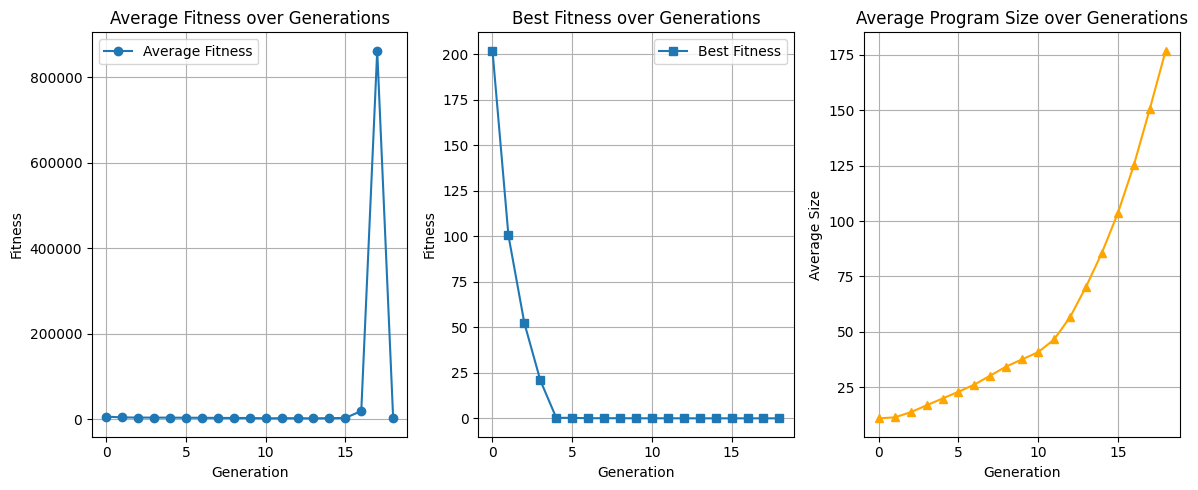

In [7]:
hist.plot()  # TODO finish this function to maybe exclude the outliers or maybe log scale?
# tiny_gp.hist.plot()  # history is also saved with the class

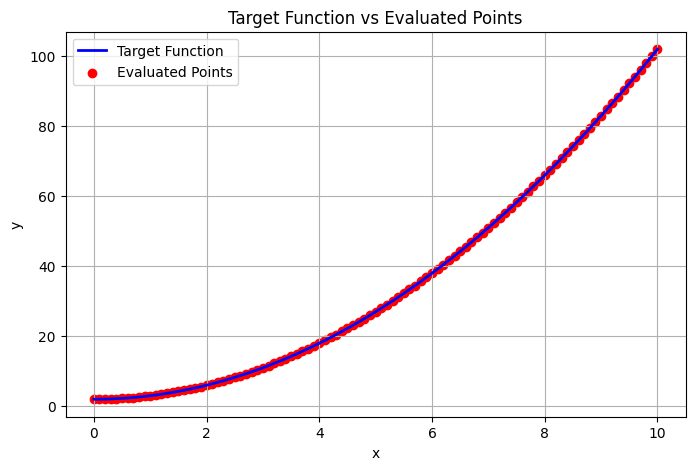

In [8]:
tiny_gp.plot()  # TODO maybe also provide error and type of fitness function?